In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df_train = pd.read_csv("../data/df_train.csv")
df_test = pd.read_csv("../data/df_test.csv")

df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [3]:
X = df_train.drop(columns = 'target',axis=1)
y = df_train['target']

In [4]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

# 기본 모델 작성

In [5]:
model = model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[31]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [6]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.MeanAbsoluteError(),
    metrics = [
        tf.keras.metrics.MeanSquaredError()
    ]
)

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
867/867 [==============================] - 4s 3ms/step - loss: 2.6175 - mean_squared_error: 15.5209 - val_loss: 2.1278 - val_mean_squared_error: 12.0327
Epoch 2/10
867/867 [==============================] - 3s 3ms/step - loss: 2.1068 - mean_squared_error: 11.3450 - val_loss: 2.0685 - val_mean_squared_error: 11.9556
Epoch 3/10
867/867 [==============================] - 2s 3ms/step - loss: 2.0652 - mean_squared_error: 11.3892 - val_loss: 2.0353 - val_mean_squared_error: 12.1490
Epoch 4/10
867/867 [==============================] - 3s 3ms/step - loss: 2.0431 - mean_squared_error: 11.6639 - val_loss: 2.0168 - val_mean_squared_error: 12.3687
Epoch 5/10
867/867 [==============================] - 3s 3ms/step - loss: 2.0299 - mean_squared_error: 11.9240 - val_loss: 2.0049 - val_mean_squared_error: 12.5300
Epoch 6/10
867/867 [==============================] - 3s 3ms/step - loss: 2.0213 - mean_squared_error: 12.0922 - val_loss: 1.9966 - val_mean_squared_error: 12.7195
Epoch 7/10
867/8

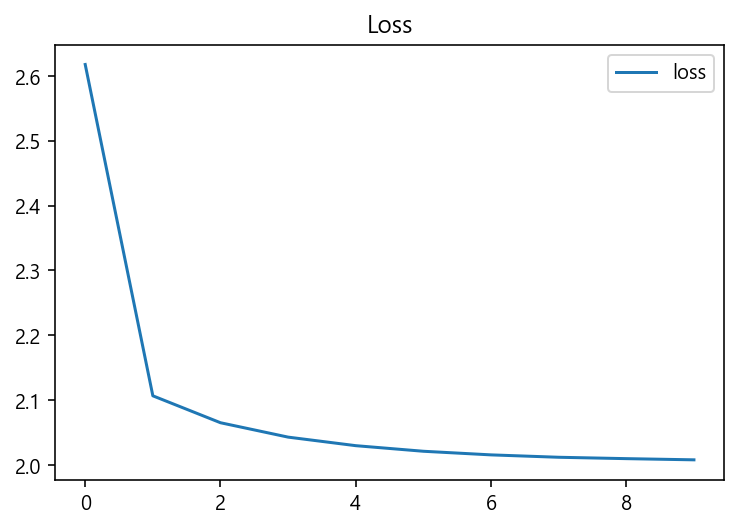

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.title('Loss')
plt.legend()
plt.show()

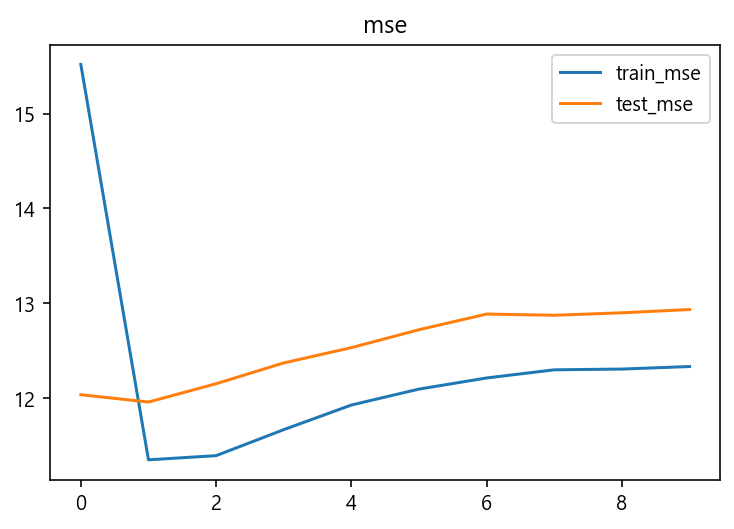

In [9]:
plt.plot(history.history['mean_squared_error'], label='train_mse')
plt.plot(history.history['val_mean_squared_error'], label='test_mse')
plt.title('mse')
plt.legend()
plt.show()

# model A,B,C 비교

In [10]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[31], activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[31]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1)
])

In [12]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[31]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1)
])

In [13]:
model_a.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mse'])
model_b.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mse'])
model_c.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mse'])

In [14]:
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
867/867 [==============================] - 4s 3ms/step - loss: 2.2339 - mse: 13.2083 - val_loss: 1.9882 - val_mse: 12.4163
Epoch 2/10
867/867 [==============================] - 3s 3ms/step - loss: 2.0087 - mse: 11.7583 - val_loss: 1.9825 - val_mse: 12.4574
Epoch 3/10
867/867 [==============================] - 3s 3ms/step - loss: 2.0040 - mse: 11.8027 - val_loss: 1.9784 - val_mse: 12.4571
Epoch 4/10
867/867 [==============================] - 3s 3ms/step - loss: 2.0021 - mse: 11.8271 - val_loss: 1.9781 - val_mse: 12.4702
Epoch 5/10
867/867 [==============================] - 3s 3ms/step - loss: 1.9989 - mse: 11.8428 - val_loss: 1.9863 - val_mse: 12.1375
Epoch 6/10
867/867 [==============================] - 3s 3ms/step - loss: 1.9972 - mse: 11.7686 - val_loss: 1.9789 - val_mse: 12.4947
Epoch 7/10
867/867 [==============================] - 3s 3ms/step - loss: 1.9955 - mse: 11.7522 - val_loss: 1.9760 - val_mse: 12.3490
Epoch 8/10
867/867 [==============================] - 3s 3ms/s

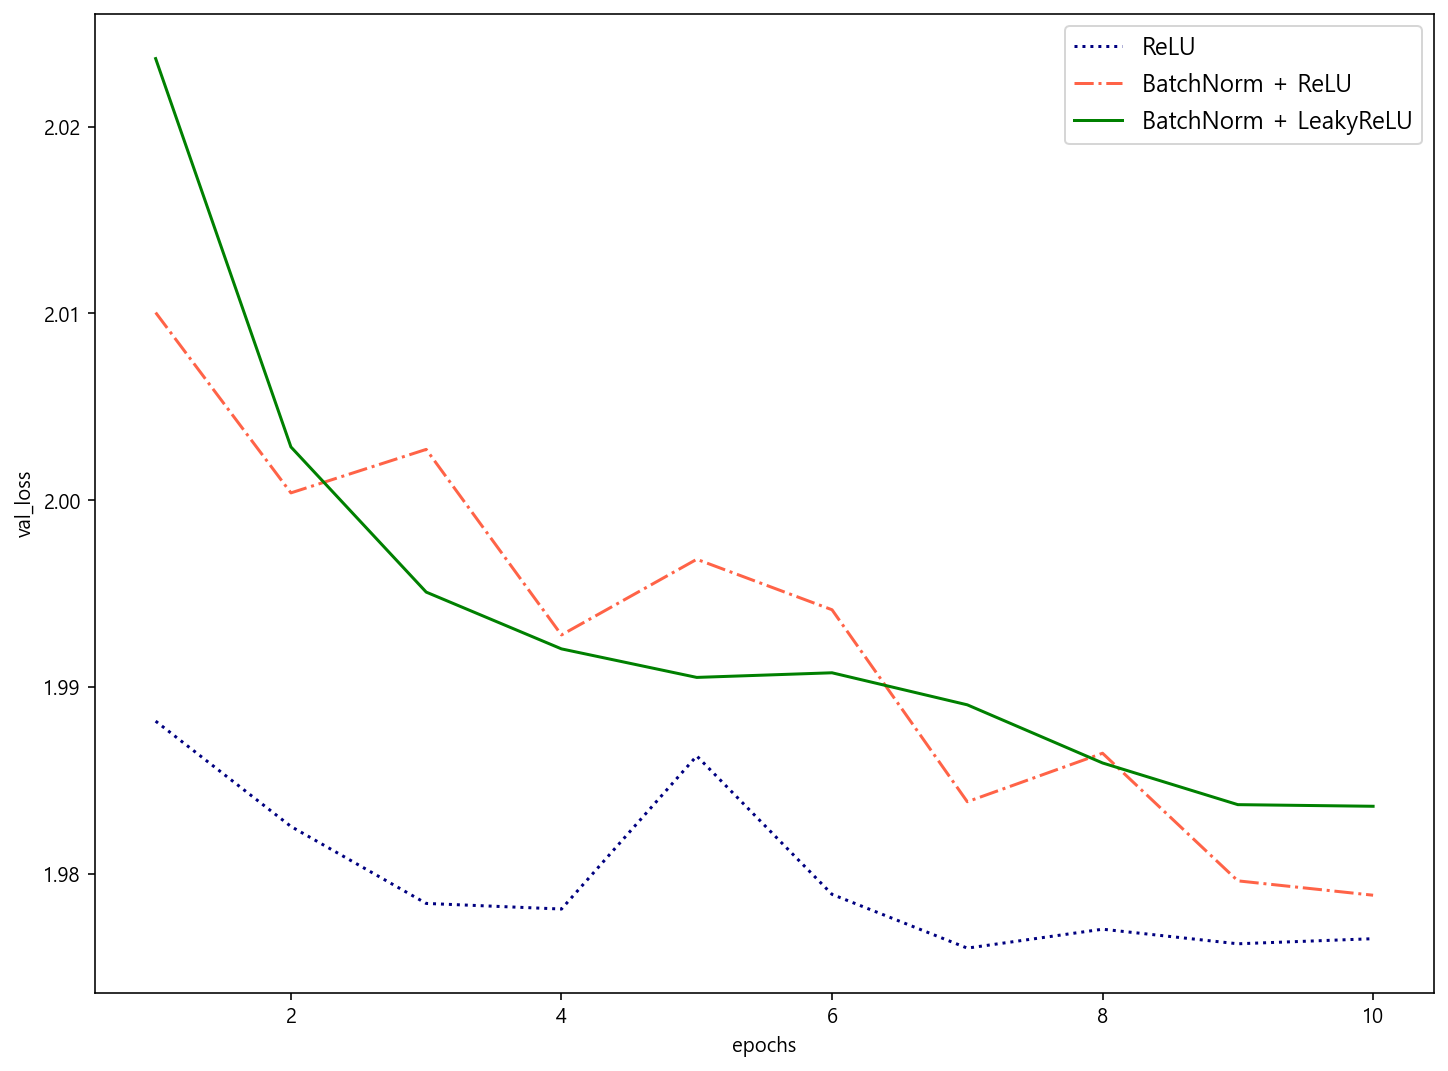

In [15]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy',linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato',linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

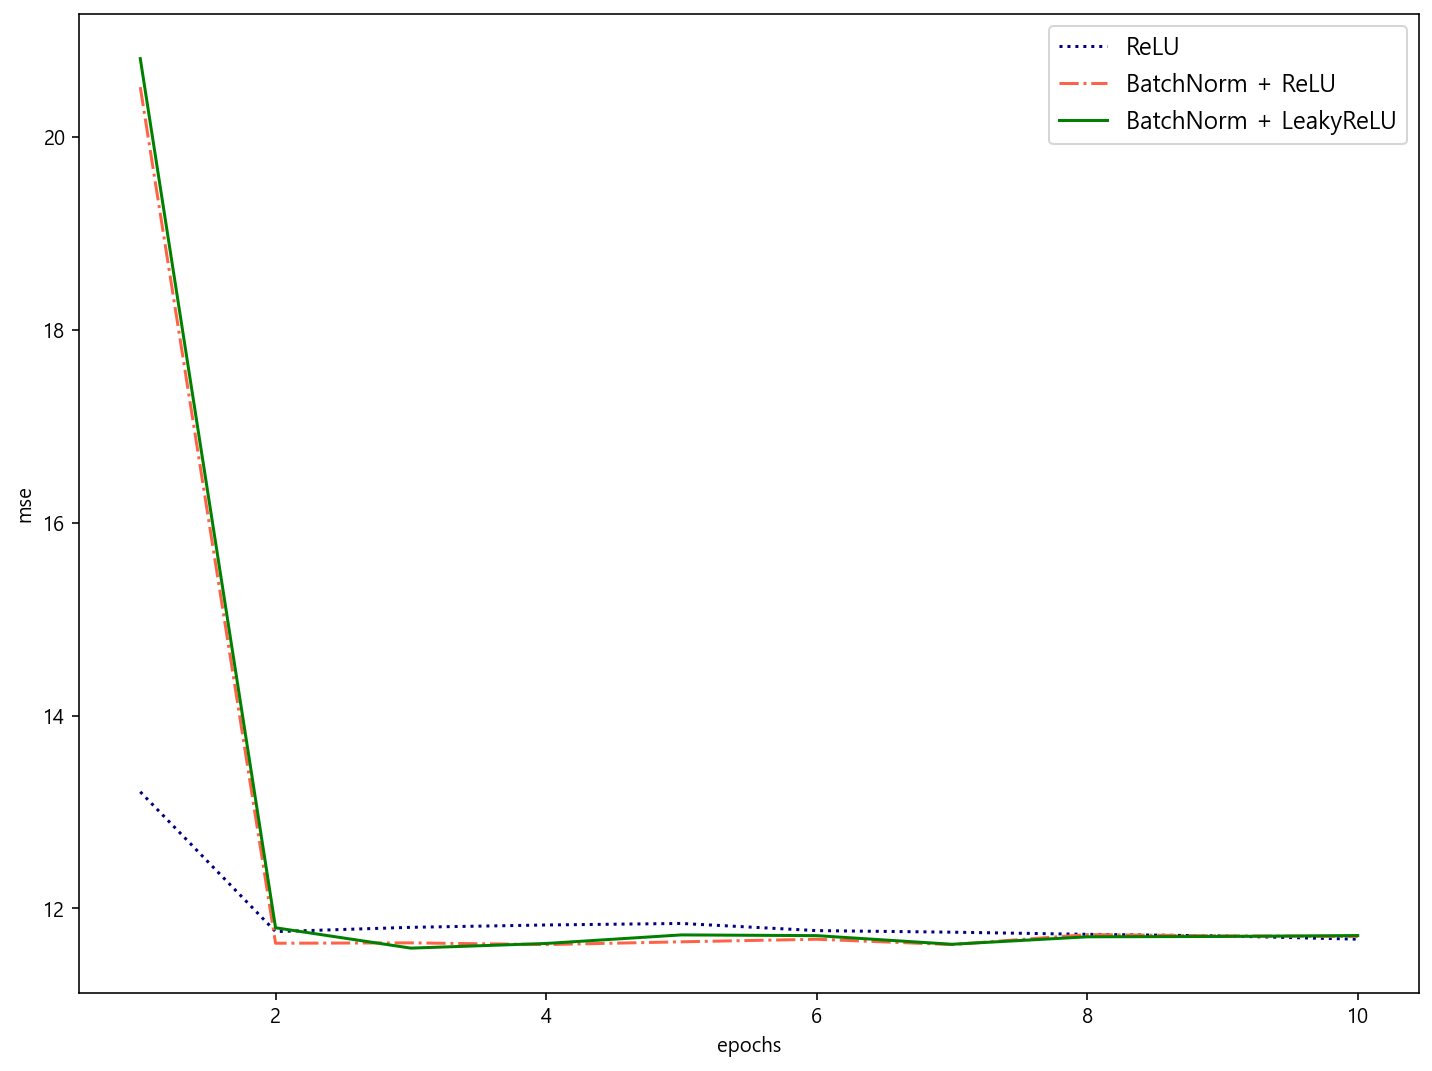

In [16]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,11), history_a.history['mse'], color='navy',linestyle=':')
plt.plot(np.arange(1,11), history_b.history['mse'], color='tomato',linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['mse'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

# 제출

In [17]:
model_c.save('../model/001_Batch_Leaky-model.h5')

In [18]:
sub_file = pd.read_csv("../data/sample_submission.csv")

In [19]:
sub_file['ECLO'] = model_c.predict(df_test)
sub_file['ECLO'] = round(sub_file['ECLO'])

343/343 [==============================] - 1s 2ms/step


In [21]:
sub_file.to_csv("../data/sub_file/002tf_round.csv", index=False)